In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
housing = pd.read_csv("Housing.csv")
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
print(f"the housing shape is:{housing.shape}")
print("")
print(housing.columns)

the housing shape is:(545, 13)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [8]:
y = housing["price"].values
x = housing["bedrooms"].values

In [9]:
x = x.reshape(-1, 1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(len(train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)))

x_train shape (436, 1)
y_train shape (436,)
x_test shape (109, 1)
y_test shape (109,)
4


In [11]:
# Split the data into training and testing sets
train = housing.sample(frac=0.8, random_state=1)
test = housing.drop(train.index)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
# le = LabelEncoder()

# Fit the label encoder to the "furnishingstatus" column
#train["furnishingstatus"] = le.fit_transform(train["furnishingstatus"])
#test["furnishingstatus"] = le.transform(test["furnishingstatus"])


# Define the input features and target variable
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_features = ["bedrooms", "bathrooms", "parking"]
target ="price"

# One-hot encode the categorical variables
train_encoded = pd.get_dummies(train[categorical_features])
test_encoded = pd.get_dummies(test[categorical_features])

# Combine the numerical variables with the encoded categorical variables
train_features = pd.concat([train[numerical_features], train_encoded], axis=1)
test_features = pd.concat([test[numerical_features], test_encoded], axis=1)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_features, train[target])

# Predict the prices for the test data
predictions = model.predict(test_features)



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(test[target], predictions)

# Calculate R-squared
r2 = r2_score(test[target], predictions)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(np.mean((predictions - test[target]) ** 2))


# Print the metrics
print("Mean squared error:", mse)
print("R-squared:", r2)
print("RMSE: ", rmse)
r2

Mean squared error: 1826269784322.5322
R-squared: 0.49410339938770864
RMSE:  1351395.4951540027


0.49410339938770864

In [14]:
from sklearn.metrics import f1_score


In [15]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f" Train Accuracy: {lm.score(x_train, y_train)}")
print(f" Test Accuracy: {lm.score(x_test, y_test)}")


 Train Accuracy: 0.12160620899847852
 Test Accuracy: 0.17587906456107505


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

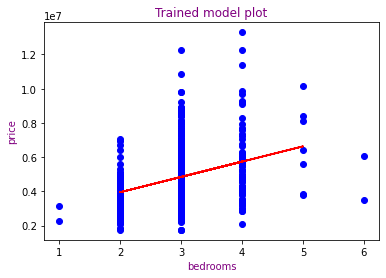

In [16]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_test, y_predict, color = "red")
plt.xlabel('bedrooms', color = "purple")
plt.ylabel('price', color = "purple")
plt.title('Trained model plot', color = "purple")
plt.plot

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

housing = pd.read_csv("Housing.csv")

print(f"the housing shape is: {housing.shape}")
print("")
print(housing.columns)

y = housing["price"].values
x = housing["bedrooms"].values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, train_size=0.8, test_size=0.2, random_state=100)

# Split the data into training and testing sets
train = housing.sample(frac=0.8, random_state=1)
test = housing.drop(train.index)

# Create a label encoder object
# le = LabelEncoder()

# Fit the label encoder to the "furnishingstatus" column
#train["furnishingstatus"] = le.fit_transform(train["furnishingstatus"])
#test["furnishingstatus"] = le.transform(test["furnishingstatus"])


# Define the input features and target variable
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_features = ["bedrooms", "bathrooms", "parking"]
target ="price"

# One-hot encode the categorical variables
train_encoded = pd.get_dummies(train[categorical_features])
test_encoded = pd.get_dummies(test[categorical_features])

# Combine the numerical variables with the encoded categorical variables
train_features = pd.concat([train[numerical_features], train_encoded], axis=1)
test_features = pd.concat([test[numerical_features], test_encoded], axis=1)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_features, train[target])

# Predict the prices for the test data
predictions = model.predict(test_features)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(test[target], predictions)

pickle.dump(model,open("model.pkl","wb"))
model_pickle=pickle.load(open("model.pkl","rb"))
# Calculate R-squared
r2 = r2_score(test[target], predictions)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(np.mean((predictions - test[target]) ** 2))

# Print the metrics
print("Mean squared error:", mse)
print("R-squared:", r2)
print("RMSE: ", rmse)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f" Train Accuracy: {lm.score(x_train, y_train)}")
print(f" Test Accuracy: {lm.score(x_test, y_test)}")


the housing shape is: (545, 13)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean squared error: 1826269784322.5322
R-squared: 0.49410339938770864
RMSE:  1351395.4951540027
 Train Accuracy: 0.12160620899847852
 Test Accuracy: 0.17587906456107505


In [19]:
train_features 

,bedrooms,bathrooms,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
62,4,2,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
247,4,1,3,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
142,4,2,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
107,3,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1
483,3,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,3,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
36,3,2,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0
30,3,2,2,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1
20,3,1,2,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0
